Table of Contents
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define Path
path = r'/Users/jakeupchurch/Documents/UFC Project'

In [5]:
# Import Data
ufc = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data.csv'))

## 2. Data Cleaning

In [6]:
ufc.shape

(6012, 144)

In [7]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [8]:
ufc.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [17]:
#Merge R_win_by_KO/TKO and B_win_by_KO/TKO since we only need to know if win was by TKO
#Merge R_win_by_TKO_Doctor_Stoppage and B_win_by_TKO_Doctor_Stoppage for same reason
ufc['KO/TKO_Win'] = ufc['R_win_by_KO/TKO'] + ufc['B_win_by_KO/TKO']
ufc['TKO_Dr'] = ufc['R_win_by_TKO_Doctor_Stoppage'] + ufc['B_win_by_TKO_Doctor_Stoppage']

In [18]:
ufc.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age',
       'KO/TKO_Win', 'TKO_Dr'],
      dtype='object', length=146)

In [39]:
#Create Subset using Columns to Explore Data Easier
ufc3 = ufc[["B_avg_TD_pct", "B_avg_opp_TD_pct", "B_avg_SIG_STR_pct", "B_avg_opp_SIG_STR_pct", "KO/TKO_Win", "TKO_Dr"]]

In [40]:
ufc3.head()

B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  \
0         0.330           0.36000           0.420000                0.49500   
1         0.300           0.50000           0.660000                0.30500   
2           NaN               NaN                NaN                    NaN   
3           NaN               NaN                NaN                    NaN   
4         0.185           0.16625           0.535625                0.57875   

   KO/TKO_Win  TKO_Dr  
0           1       0  
1           4       0  
2           3       0  
3           0       0  
4           4       0

In [25]:
#Check for Missing Values
ufc.isnull().sum() #Missing Values should not affect analysis

R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Weight_lbs      2
B_age           172
R_age            63
KO/TKO_Win        0
TKO_Dr            0
Length: 146, dtype: int64

In [26]:
#Find Duplicates
df_dups = ufc[ufc.duplicated()]

In [27]:
df_dups.shape #No Duplicates

(0, 146)

In [28]:
#Check for Mixed-Type Data
for col in ufc.columns.tolist():
      weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (ufc[weird]) > 0:
        print (col)

Referee
B_Stance
R_Stance


/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var

In [29]:
ufc['Referee'] = ufc['Referee'].astype(str)
ufc['B_Stance'] = ufc['B_Stance'].astype(str)
ufc['R_Stance'] = ufc['R_Stance'].astype(str)

In [30]:
#Check for Mixed-Type Data
for col in ufc.columns.tolist():
      weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (ufc[weird]) > 0:
        print (col)

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/647521239.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (ufc[[col]].applymap(type) != ufc[[col]].iloc[0].apply(type)).any(axis = 1)
/var

## 3. Exploring Relationships

## Correlations:

In [41]:
#Create a Correlation Matrix using pandas
ufc3.corr()

B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SIG_STR_pct  \
B_avg_TD_pct               1.000000         -0.148794           0.155618   
B_avg_opp_TD_pct          -0.148794          1.000000          -0.089951   
B_avg_SIG_STR_pct          0.155618         -0.089951           1.000000   
B_avg_opp_SIG_STR_pct     -0.115699          0.206691          -0.037459   
KO/TKO_Win                -0.072533         -0.154888           0.124624   
TKO_Dr                     0.031154         -0.039941           0.049581   

                       B_avg_opp_SIG_STR_pct  KO/TKO_Win    TKO_Dr  
B_avg_TD_pct                       -0.115699   -0.072533  0.031154  
B_avg_opp_TD_pct                    0.206691   -0.154888 -0.039941  
B_avg_SIG_STR_pct                  -0.037459    0.124624  0.049581  
B_avg_opp_SIG_STR_pct               1.000000   -0.081346 -0.057931  
KO/TKO_Win                         -0.081346    1.000000  0.276359  
TKO_Dr                             -0.057931    0.276359  1.000000

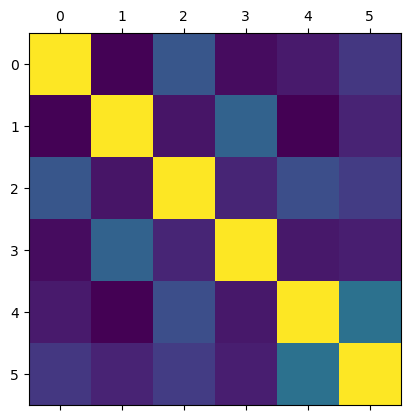

In [43]:
# Create a correlation heatmap using matplotlib

plt.matshow(ufc3.corr())
plt.show()

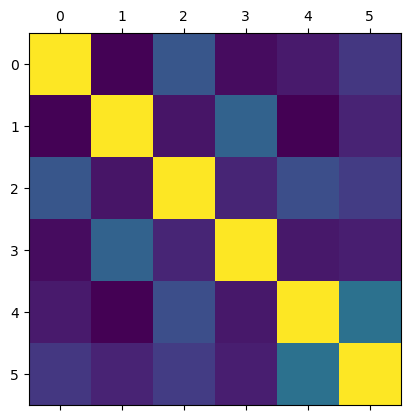

In [44]:
# Save figure
plt.matshow(ufc3.corr())
plt.savefig("ufc3stat.png")

In [45]:
#current dir
cwd = os.getcwd()
cwd

'/Users/jakeupchurch/Documents/UFC Project/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

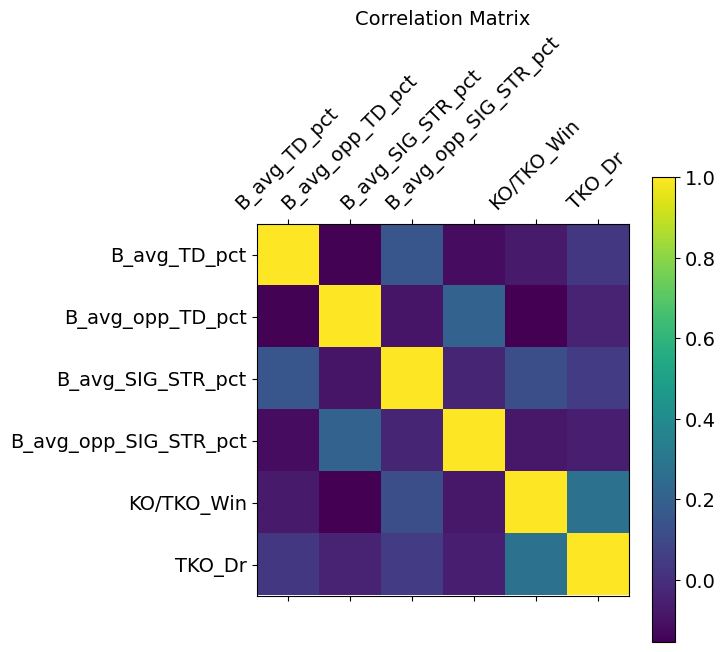

In [46]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(ufc3.corr(), fignum=f.number) # type of plot
plt.xticks(range(ufc3.shape[1]), ufc3.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(ufc3.shape[1]), ufc3.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

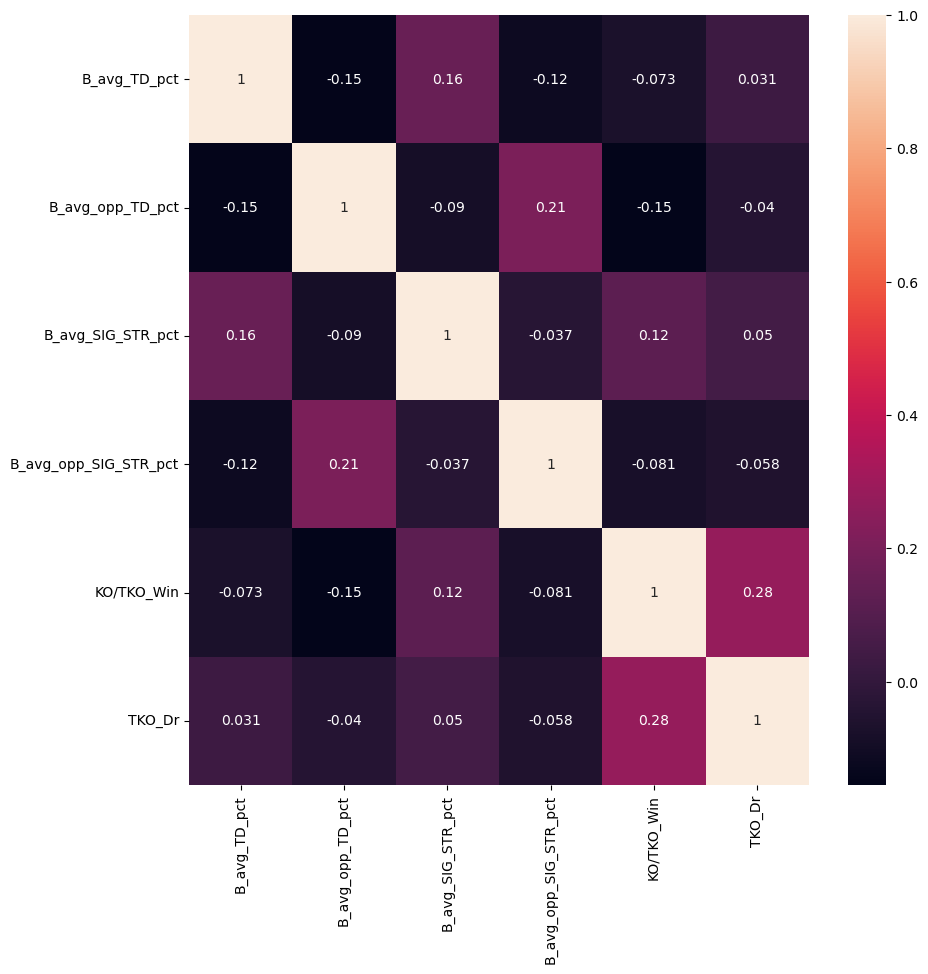

In [47]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(ufc3.corr(), annot = True, ax = ax)

Question 3:  The coefficients in the plot above represent the strenght of the correlation between the variables.
The lower the number the weaker the correlation and if there is a negative in front of the number it means there is a negative correlation.

## Scatterplots:

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


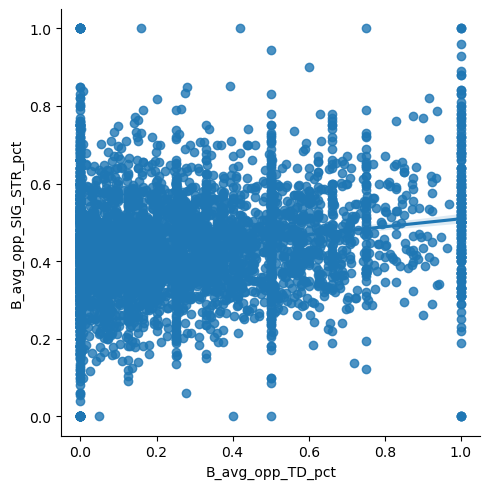

In [49]:
#Create Scatterplot for "B_avg_opp_TD_pct" and "B_avg_opp_SIG_STR_pct" in Seaborn
sns.lmplot(x = 'B_avg_opp_TD_pct', y = 'B_avg_opp_SIG_STR_pct', data = ufc3)

Question 4:This scatterplot is showing how average opponents takedown percent is related to average opponents significant strike percent.  There is a slightly positive relationship between the two variables but there is also quite a few outlier data points.  This is interesting to see because different fighters have different approaches and some are better at wrestling (takedowns) and some are better at boxing (significant strikes).

## Pair Plots:

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

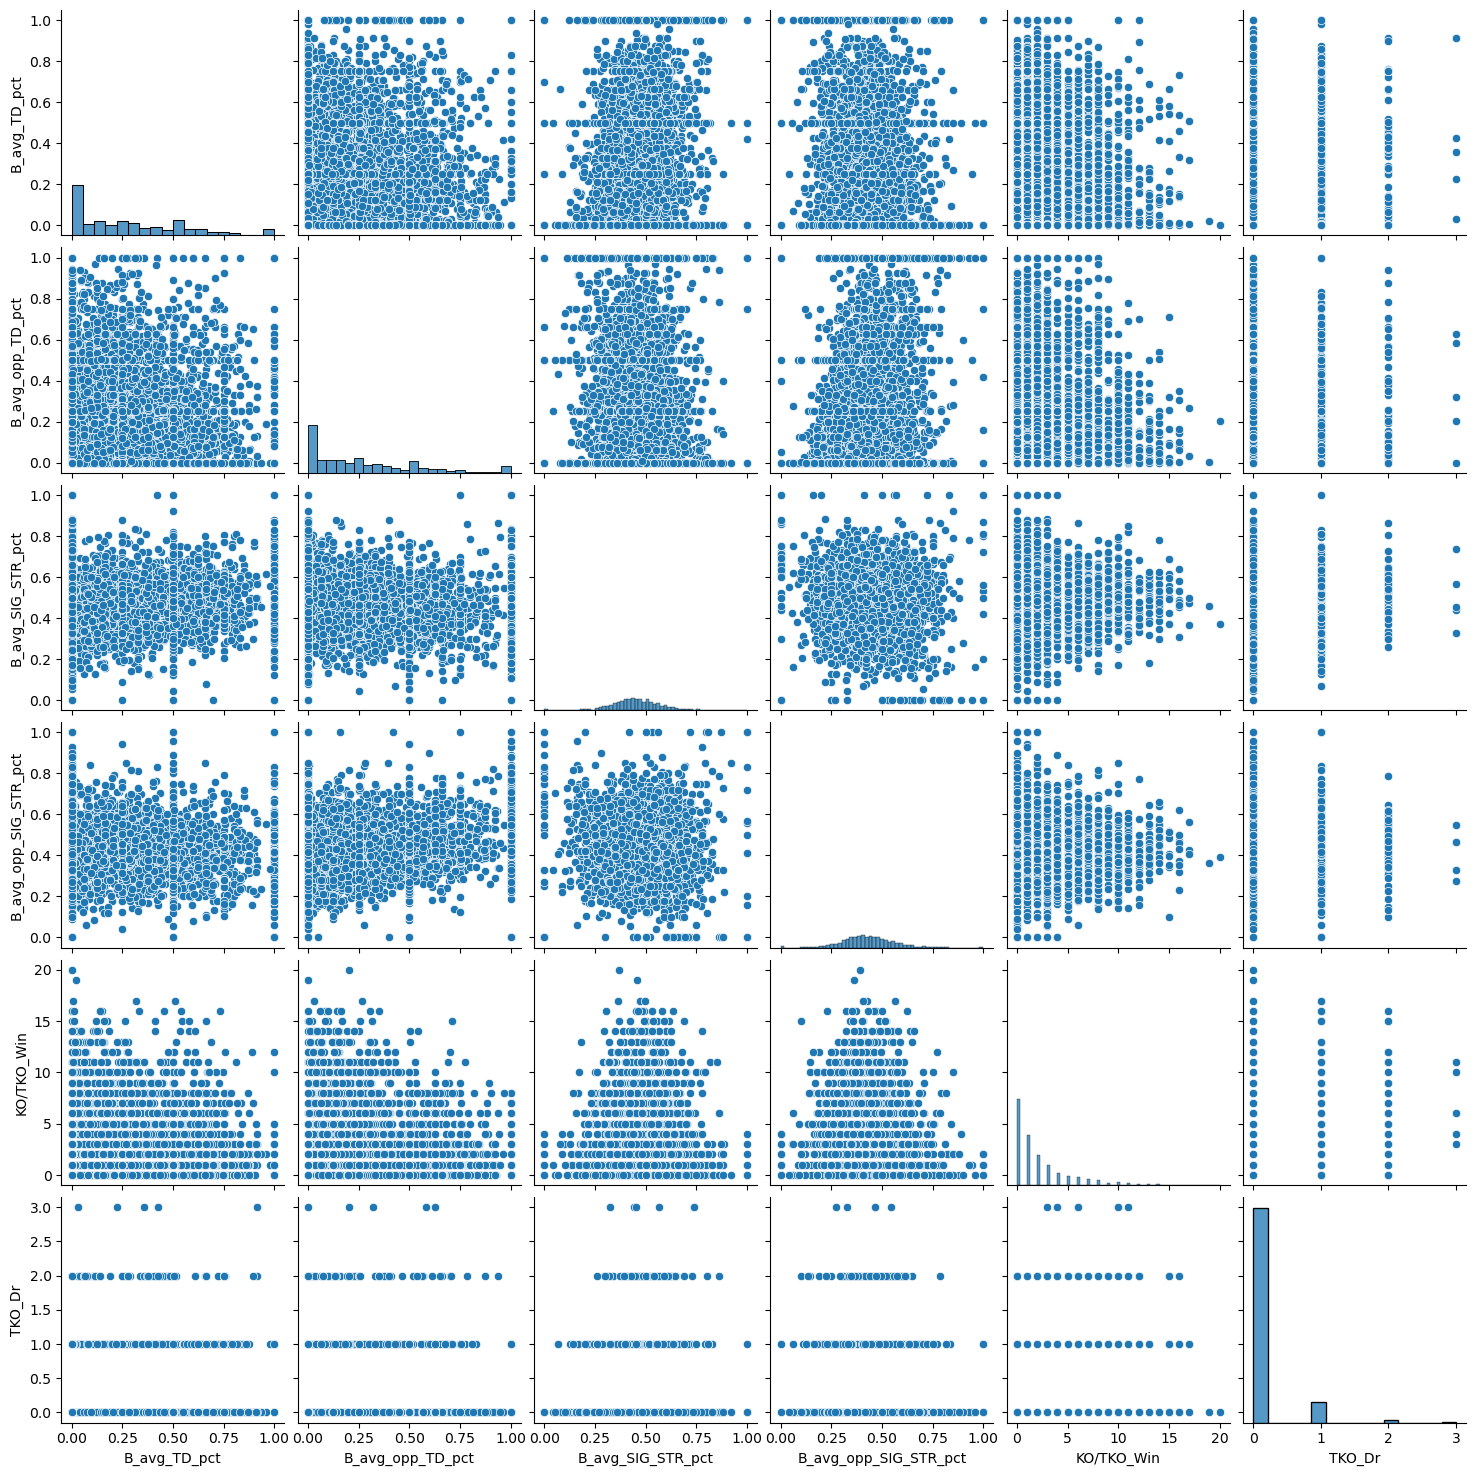

In [50]:
# Create a pair plot 

g = sns.pairplot(ufc3)

Question 5:  The variable distribution in this pair plot does not provide a lot of insightful information.  The scatterplots do not show a lot of relationship or patterns, but I am interested in KO/TKO_Win row because it does show some resemblance of a pattern, especially with the TD and SIG STR percents.  The pair plots have definitely shown me I need to consider other variables in my analysis.

## Categorical Plots:

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='KO/TKO_Win', ylabel='Count'>

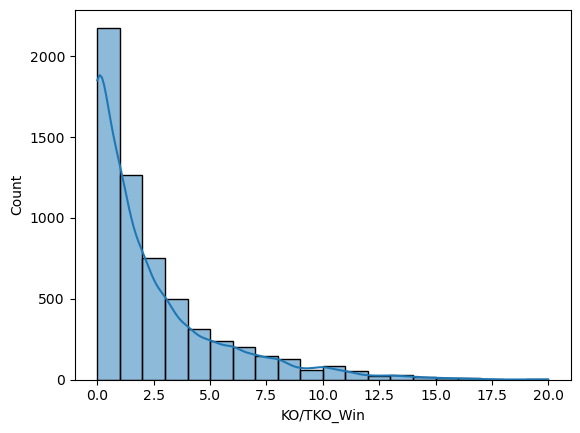

In [53]:
#Use a histogram to visualize the distribution of KO/TKO_Win

sns.histplot(ufc3['KO/TKO_Win'], bins = 20, kde = True)

In [55]:
ufc3.loc[ufc3['KO/TKO_Win'] < 5, 'Round category'] = 'Low Round'

/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/802184084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc3.loc[ufc3['KO/TKO_Win'] < 5, 'Round category'] = 'Low Round'
/var/folders/d7/tdqhb3ts28d9ktpgvgcgs8dc0000gn/T/ipykernel_43473/802184084.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Round' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ufc3.loc[ufc3['KO/TKO_Win'] < 5, 'Round category'] = 'Low Round'


In [57]:
ufc3.loc[(ufc3['KO/TKO_Win'] >= 5) & (ufc3['KO/TKO_Win'] < 10), 'Round category'] = 'Middle Round'

In [58]:
ufc3.loc[ufc3['KO/TKO_Win'] >= 10, 'Round category'] = 'High Round'

In [59]:
ufc3['Round category'].value_counts(dropna = False)

Round category
Low Round       5008
Middle Round     780
High Round       224
Name: count, dtype: int64

/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jakeupchurch/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

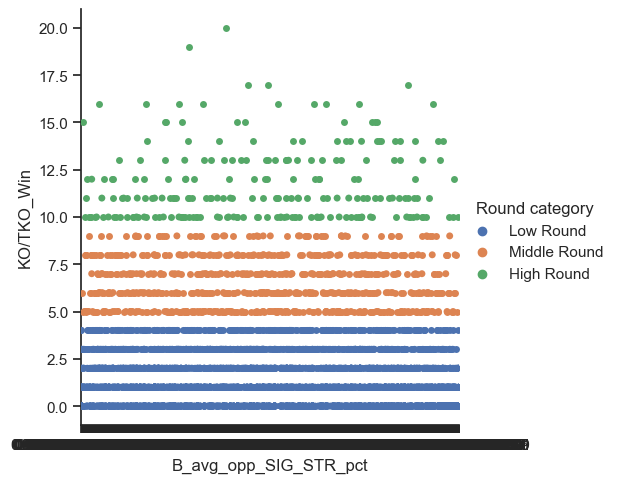

In [61]:
# Create a categorical plot in seaborn using the round categories created above

sns.set(style="ticks")
g = sns.catplot(x="B_avg_opp_SIG_STR_pct", y="KO/TKO_Win", hue="Round category", data=ufc3)

Question 6:  This categorical plot shows the relatiosnhp between average opponents signifcant strike percentage and which round there was a KO/TKO Win.  This shows there is not much of a relationship between the two variables, however, this is interesting because it shows there can be a KO/TKO win in any round category no matter the opponents strike percentage.  

Question 7:  The only question that I answered using the exploratory analysis in this question is "Can fighter statistics predict a victory?"  It appears the statistics I have explored so far have no relationship to KO/TKO victories but I will need to explore more on other types of victories.  This analysis did allow me to ask more questions about my project.  The first new question I have is does the round in which the fighter won have any relationship with how the fight was won?  The second new question is are fighter statistics related to other types of wins, especially decisions where judges score the fight?

Quesiton 8:  So far, I only have a couple of hypotheses that I can define at this point:
1. Figher statistics cannot predict KO/TKO victories.
2. Doctor stoppages make up a very small amount of KO/TKO victories.